In [34]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, GenerationConfig, TrainingArguments, Trainer
import torch
import time
import pandas as pd
import numpy as np
import string
from nltk.corpus import stopwords
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.pipeline import Pipeline
import seaborn as sns

In [4]:
!pip install evaluate

In [5]:
columns = ['greetings', 'respect']
df = pd.read_csv('dialogs.txt', sep='\t', names=columns)

In [6]:
df.head()

,greetings,respect
0,"hi, how are you doing?",i'm fine. how about yourself?
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,no problem. so how have you been?,i've been great. what about you?
4,i've been great. what about you?,i've been good. i'm in school right now.


In [7]:
df.shape

(3725, 2)

In [8]:
df.isnull().sum()

greetings    0
respect      0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [10]:
# Length distribution of questions and answers
df['greetings_length'] = df['greetings'].apply(len)
df['respect_length'] = df['respect'].apply(len)

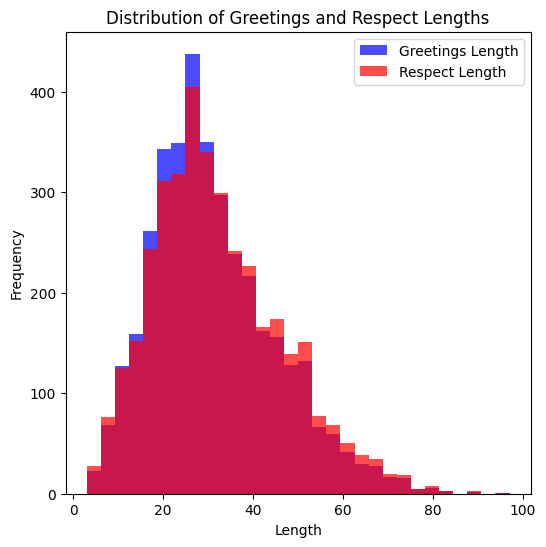

In [11]:
# Visualization
plt.figure(figsize=(6, 6))
plt.hist(df['greetings_length'], bins=30, alpha=0.7, color='blue', label='Greetings Length')
plt.hist(df['respect_length'], bins=30, alpha=0.7, color='red', label='Respect Length')
plt.title('Distribution of Greetings and Respect Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

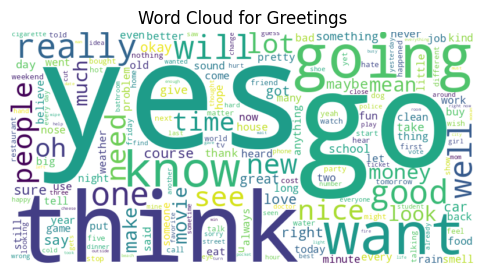

In [12]:
# Word cloud for questions
question_text = ' '.join(df['greetings'])
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(question_text)
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Greetings')
plt.axis('off')
plt.show()

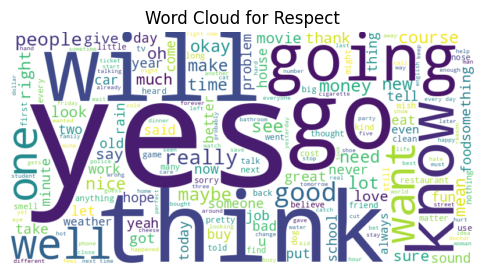

In [13]:
# Word cloud for questions
question_text = ' '.join(df['respect'])
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(question_text)
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Respect')
plt.axis('off')
plt.show()

In [14]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob


2.4. Topic Modeling:
Use techniques like Latent Dirichlet Allocation (LDA) to identify underlying topics in the questions and answers.
Cluster similar questions and answers based on topic distributions.

In [15]:
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df['greetings'])
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)
# Display the top words for each topic
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx}:", ", ".join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]]))

Topic 0: think, really, time, maybe, mean, ve, ll, better, let, doing
Topic 1: like, yes, want, didn, day, right, say, does, going, just
Topic 2: good, know, don, need, sure, course, great, job, new, haven
Topic 3: did, people, lot, school, don, today, really, yes, oh, think
Topic 4: ll, going, okay, nice, money, got, just, think, make, car


Language Complexity:
Measure the complexity of language used in questions and answers (e.g., average word length, vocabulary richness).
Explore readability scores or linguistic features.

In [16]:
df['greetings_word_count'] = df['greetings'].apply(lambda x: len(x.split()))
df['respect_word_count'] = df['respect'].apply(lambda x: len(x.split()))

In [17]:
# Analyze language complexity
avg_question_word_length = df['greetings'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split())).mean()
avg_answer_word_length = df['respect'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split())).mean()

print("\nAverage word length in Greetings:", avg_question_word_length)
print("Average word length in Respect:", avg_answer_word_length)


Average word length in Greetings: 4.166015845093442
Average word length in Respect: 4.175336153968232


Data Preprocessing
3.1. Data Augmentation (UPSampling)

In [18]:
# Define the new dialogue data
new_dialogue_data = [
    ["Hi", "Hello"],
    ["How are you?", "I'm good, thanks for asking. How about you?"],
    ["I'm doing well too.", "That's great to hear. What have you been up to lately?"],
    ["Not much, just working and spending time with family.", "That sounds nice. Have you watched any good movies recently?"],
    ["Yeah, I saw a really good one last weekend.", "It was a thriller, right? I heard good things about it."],
    ["Yes, it was.", "Do you want to watch it together sometime?"],
    ["Sure, that sounds like a plan.", "Awesome! Let's plan it for this weekend."],
    ["Sounds good to me.", "Alright then, it's a plan. What time works for you?"],
    ["How about Saturday evening?", "Perfect! Saturday evening it is. I'll book the tickets."],
    ["Great! Looking forward to it.", "Me too. It'll be fun."]
]

In [19]:
new_df = pd.DataFrame(new_dialogue_data, columns=columns)

# Concatenate the new DataFrame with the existing DataFrame
df = pd.concat([df, new_df], ignore_index=True)

# Print the updated DataFrame
df

,greetings,respect,greetings_length,respect_length,greetings_word_count,respect_word_count
0,"hi, how are you doing?",i'm fine. how about yourself?,22.0,29.0,5.0,5.0
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.,29.0,35.0,5.0,6.0
2,i'm pretty good. thanks for asking.,no problem. so how have you been?,35.0,33.0,6.0,7.0
3,no problem. so how have you been?,i've been great. what about you?,33.0,32.0,7.0,6.0
4,i've been great. what about you?,i've been good. i'm in school right now.,32.0,40.0,6.0,8.0
...,...,...,...,...,...,...
3730,"Yes, it was.",Do you want to watch it together sometime?,NaN,NaN,NaN,NaN
3731,"Sure, that sounds like a plan.",Awesome! Let's plan it for this weekend.,NaN,NaN,NaN,NaN
3732,Sounds good to me.,"Alright then, it's a plan. What time works for...",NaN,NaN,NaN,NaN
3733,How about Saturday evening?,Perfect! Saturday evening it is. I'll book the...,NaN,NaN,NaN,NaN


Preprocessing
Lowercase
Tokenization
Stop words removal
Lemmization

In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
# Function for preprocessing text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
#     tokens = word_tokenize(text)
#     tokens = [word for word in tokens if word.isalnum()]
#     preprocessed_text = ' '.join(tokens)

    return text

# Apply preprocessing to question and answer columns
preprocessed_df = df.copy()
preprocessed_df['greetings'] = preprocessed_df['greetings'].apply(preprocess_text)
preprocessed_df['respect'] = preprocessed_df['respect'].apply(preprocess_text)

# Print the preprocessed DataFrame
preprocessed_df

,greetings,respect,greetings_length,respect_length,greetings_word_count,respect_word_count
0,"hi, how are you doing?",i'm fine. how about yourself?,22.0,29.0,5.0,5.0
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.,29.0,35.0,5.0,6.0
2,i'm pretty good. thanks for asking.,no problem. so how have you been?,35.0,33.0,6.0,7.0
3,no problem. so how have you been?,i've been great. what about you?,33.0,32.0,7.0,6.0
4,i've been great. what about you?,i've been good. i'm in school right now.,32.0,40.0,6.0,8.0
...,...,...,...,...,...,...
3730,"yes, it was.",do you want to watch it together sometime?,NaN,NaN,NaN,NaN
3731,"sure, that sounds like a plan.",awesome! let's plan it for this weekend.,NaN,NaN,NaN,NaN
3732,sounds good to me.,"alright then, it's a plan. what time works for...",NaN,NaN,NaN,NaN
3733,how about saturday evening?,perfect! saturday evening it is. i'll book the...,NaN,NaN,NaN,NaN


Classical ML ChatBot

In [22]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(preprocessed_df['greetings'], preprocessed_df['respect'], test_size=0.2, random_state=42, shuffle=True)

Model Pipline and training

In [23]:
Pipe1 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', RandomForestClassifier())
])

In [24]:
Pipe1.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [25]:
Pipe1.predict(['no problem. so how have you been?'])[0]

"i've been great. what about you?"

In [27]:
Pipe1.predict(['how about saturday evening?'])[0]

"perfect! saturday evening it is. i'll book the tickets."

In [28]:
Pipe1.predict(['sure, that sounds like a plan'])[0]

"awesome! let's plan it for this weekend."

In [32]:
# Predicting text using the pipeline on the test set
predicted_text = Pipe1.predict(X_test)

# Creating a DataFrame to compare the first 10 results
response_df = pd.DataFrame({'Real Greetings ': X_test[:10],'Real Generated Greetings': y_test[:10], 'Predicted Respect': predicted_text[:10]})

In [33]:
response_df.head(20)

,Real Greetings,Real Generated Greetings,Predicted Respect
3253,how are you doing that?,i started shopping at the dollar store.,i'm doing great. what about you?
3190,"the pants are fine, but the pocket has a huge ...",you shouldn't carry your keys and pens in your...,"you do this 18 times, because there are 18 holes."
2194,uh-oh. that means that she's fat and ugly.,she's cute.,men singers don't have to look good.
3303,that's great. we won't have neighbors on both ...,no pets are allowed.,that doesn't matter. i don't want to sit around.
642,"i really wanted you to come, but i understand.","yeah, maybe next time.",i have things to do.
3214,that's a good deal.,and a one-pound tub of soft butter was the sam...,"yes, even though some of the potatoes had eyes."
184,she's one of the prettiest girls at the school.,what does she look like?,maybe we should learn some good jokes.
3515,"no, that's not the problem.",maybe it will go away in a little while.,did you need something?
3185,why not?,i didn't want to pay for the holes.,she would laugh at me.
2206,eight o'clock.,that sounds great.,i have the dvd.


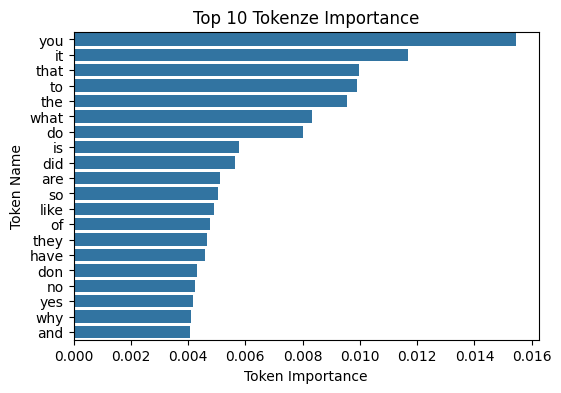

In [36]:
# Visualize Feature Importance
if isinstance(Pipe1.named_steps['classifier'], RandomForestClassifier):
    feature_importances = Pipe1.named_steps['classifier'].feature_importances_
    feature_names = Pipe1.named_steps['tfidf'].get_feature_names_out()

    # Sort feature importances
    sorted_indices = feature_importances.argsort()[::-1]
    top_feature_importances = feature_importances[sorted_indices][:20]
    top_feature_names = np.array(feature_names)[sorted_indices][:20]

    plt.figure(figsize=(6, 4))
    sns.barplot(x=top_feature_importances, y=top_feature_names)
    plt.xlabel('Token Importance')
    plt.ylabel('Token Name')
    plt.title('Top 10 Tokenze Importance')
    plt.show()

In [38]:
# Function to get response from chatbot
def get_response(question):
    response = Pipe1.predict([question])[0]
    return response

# Function to interact with the user
def chat():
    while True:
        question = input("You: ")
        if question.lower() == 'quit':
            print("Chatbot: Goodbye!")
            break
        response = get_response(question)
        print("Chatbot:", response)

# Start the chat
chat()

You: Hello
Chatbot: this is she. how's it going?
You: It's Going Well
Chatbot: i'm doing well. how about you?
You: I am Fine
Chatbot: i'm having a party this friday.
You: That's Great , i wanna join that 
Chatbot: yes, except this dent will cost about $150.
You: It's nominal , Tell mw when to pay 
Chatbot: i think golfers have a mental problem.
You: Is it so 
Chatbot: it looks like it may rain soon.
You: ok
Chatbot: of course. what else?
You: Do u have an Umbrella 
Chatbot: so, they do a good job for the money.
You: Yes
Chatbot: see those stains?
You: quit
Chatbot: Goodbye!
